In [1]:
%matplotlib inline

In [2]:
import pickle
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt # plotting
import seaborn as sns
import numpy as np # linear algebra
import os # accessing directory structure
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [3]:
SEED=1

In [4]:
np.random.seed(SEED)

# Some functions

In [5]:
def load_Kannada_mnist(file_type='npz',ds_dir='/localscratch/shared/san37/Datasets'):
    if file_type=='npz':
        npz_dir=os.path.join(ds_dir,'Kannada_MNIST_npz')  
        y_test=np.load(os.path.join(npz_dir,'Kannada_MNIST','y_kannada_MNIST_test.npz'))
        y_test=y_test.f.arr_0
        X_test=np.load(os.path.join(npz_dir,'Kannada_MNIST','X_kannada_MNIST_test.npz'))
        X_test=X_test.f.arr_0
        y_train=np.load(os.path.join(npz_dir,'Kannada_MNIST','y_kannada_MNIST_train.npz'))
        y_train=y_train.f.arr_0
        X_train=np.load(os.path.join(npz_dir,'Kannada_MNIST','X_kannada_MNIST_train.npz'))
        X_train=X_train.f.arr_0
    else:
        gz_dir=os.path.join(ds_dir,'Kannada_MNIST_Ubyte_gz') 
        y_test=load_idx(os.path.join(gz_dir,'Kannada_MNIST','y_kannada_MNIST_test-idx1-ubyte.gz'))
        X_test=load_idx(os.path.join(gz_dir,'Kannada_MNIST','X_kannada_MNIST_test-idx3-ubyte.gz'))
        y_train=load_idx(os.path.join(gz_dir,'Kannada_MNIST','y_kannada_MNIST_train-idx1-ubyte.gz'))
        X_train=load_idx(os.path.join(gz_dir,'Kannada_MNIST','X_kannada_MNIST_train-idx3-ubyte.gz'))
    return (X_train, y_train), (X_test, y_test)

In [6]:
def load_Dig_mnist(file_type='npz',ds_dir='/localscratch/shared/san37/Datasets'):
    if file_type=='npz':
        npz_dir=os.path.join(ds_dir,'Kannada_MNIST_npz')  
        y_dig=np.load(os.path.join(npz_dir,'Dig_MNIST','y_dig_MNIST.npz'))
        y_dig=y_dig.f.arr_0
        X_dig=np.load(os.path.join(npz_dir,'Dig_MNIST','X_dig_MNIST.npz'))
        X_dig=X_dig.f.arr_0

    else:
        gz_dir=os.path.join(ds_dir,'Kannada_MNIST_Ubyte_gz') 
        y_dig=load_idx(os.path.join(gz_dir,'Dig_MNIST','y_dig_MNIST-idx1-ubyte.gz'))
        X_dig=load_idx(os.path.join(gz_dir,'Dig_MNIST','X_dig_MNIST-idx3-ubyte.gz'))
    return (X_dig, y_dig)

In [7]:
def load_mnist(file_type='npz',ds_dir='/localscratch/shared/san37/Datasets'):
    if file_type=='npz':
        npz_dir=os.path.join(ds_dir,'MNIST')
        with np.load(os.path.join(npz_dir, 'mnist.npz')) as f:
            x_train, y_train = f['x_train'], f['y_train']
            x_test, y_test = f['x_test'], f['y_test']
    else:
        raise AttributeError
    
    return (x_train, y_train), (x_test, y_test)

# MNIST

In [8]:
(x_train, y_train), (x_test, y_test) = load_mnist('npz')

### add a channel axis for convenient usage later

In [9]:
x_train = np.expand_dims(x_train, 1)
x_test = np.expand_dims(x_test, 1)

In [10]:
x_train.shape

(60000, 1, 28, 28)

In [11]:
x_test.shape

(10000, 1, 28, 28)

In [12]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [13]:
y_test

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

### Normalize to [0, 1]

In [14]:
x_train = x_train / 255.0
x_test = x_test / 255.0

In [15]:
print(x_train.min(), x_train.max(), x_test.min(), x_test.max())

0.0 1.0 0.0 1.0


### Sample Visualization

Text(0.5, 0.98, 'MNIST Training set - Classwise mean images')

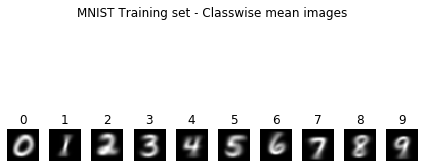

In [16]:
for i in range(10):
  plt.subplot(1,10,i+1)
  plt.imshow(np.squeeze(np.mean(x_train[y_train==i], axis=0)),cmap='gray')
  plt.axis('Off')
  plt.title(i)  
  plt.tight_layout()
plt.suptitle('MNIST Training set - Classwise mean images')

### Train/Validation Split

In [17]:
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=5000, stratify=y_train)

Text(0.5, 1.0, 'test')

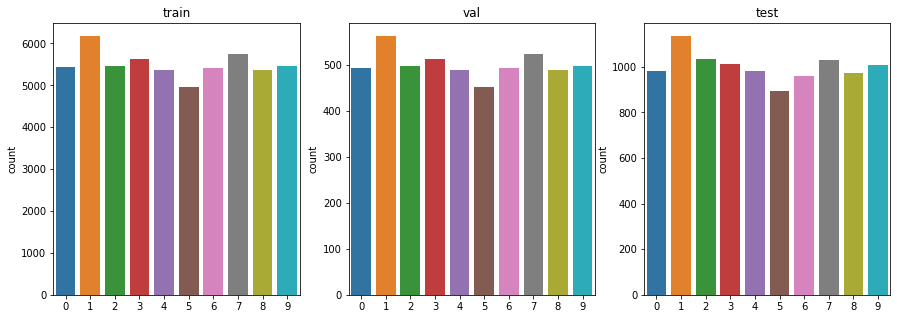

In [18]:
fig, ax =plt.subplots(1, 3, figsize=(15, 5))
a1 = sns.countplot(y_train, ax=ax[0])
a1.set_title('train')
a3 = sns.countplot(y_val, ax=ax[1])
a3.set_title('val')
a4 = sns.countplot(y_test, ax=ax[2])
a4.set_title('test')

In [19]:
mnist_full_dataset = {"x_train": x_train,
                      "y_train": y_train,
                      "x_val": x_val,
                      "y_val": y_val,
                      "x_test": x_test,
                      "y_test": y_test,
                      }

In [20]:
os.makedirs('data', exist_ok=True)

In [21]:
with open("data/mnist_full.pkl", 'wb') as f:
    pickle.dump(mnist_full_dataset, f, pickle.HIGHEST_PROTOCOL)

# Kannada-MNIST

In [22]:
(x_train, y_train), (x_test, y_test)=load_Kannada_mnist('npz')

### add a channel axis for convenient usage later

In [23]:
x_train = np.expand_dims(x_train, 1)
x_test = np.expand_dims(x_test, 1)

In [24]:
x_train.shape

(60000, 1, 28, 28)

In [25]:
x_test.shape

(10000, 1, 28, 28)

In [26]:
y_train

array([0, 1, 2, ..., 7, 8, 9], dtype=uint8)

In [27]:
y_test

array([0, 1, 2, ..., 7, 8, 9], dtype=uint8)

### Normalize to [0, 1]

In [28]:
x_train = x_train / 255.0
x_test = x_test / 255.0

In [29]:
print(x_train.min(), x_train.max(), x_test.min(), x_test.max())

0.0 1.0 0.0 1.0


Text(0.5, 0.98, 'K-MNIST Training set - Classwise mean images')

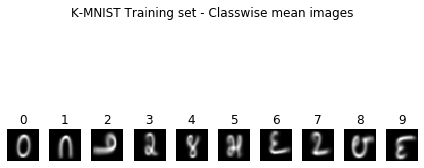

In [30]:
for i in range(10):
  plt.subplot(1,10,i+1)
  plt.imshow(np.squeeze(np.mean(x_train[y_train==i], axis=0)),cmap='gray')
  plt.axis('Off')
  plt.title(i)  
  plt.tight_layout()
plt.suptitle('K-MNIST Training set - Classwise mean images')

### Train/Validation Split

In [31]:
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=5000, stratify=y_train)

### Semi-supervised set

In [32]:
RATIO_LABELED = 0.01

In [33]:
x_train_unlabeled, x_train_labeled, y_train_unlabeled, y_train_labeled = train_test_split(x_train, y_train, test_size=RATIO_LABELED, stratify=y_train)

Text(0.5, 1.0, 'test')

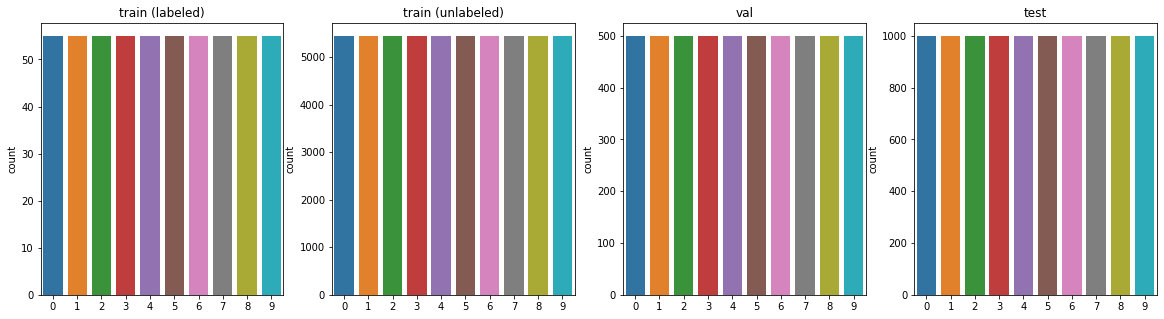

In [34]:
fig, ax =plt.subplots(1, 4, figsize=(20, 5))
a1 = sns.countplot(y_train_labeled, ax=ax[0])
a1.set_title('train (labeled)')
a2 = sns.countplot(y_train_unlabeled, ax=ax[1])
a2.set_title('train (unlabeled)')
a3 = sns.countplot(y_val, ax=ax[2])
a3.set_title('val')
a4 = sns.countplot(y_test, ax=ax[3])
a4.set_title('test')

In [35]:
kannada_semi = {"x_train_labeled": x_train_labeled,
                "y_train_labeled": y_train_labeled,
                "x_train_unlabeled": x_train_unlabeled,
                "y_train_unlabeled": y_train_unlabeled,
                "x_val": x_val,
                "y_val": y_val,
                "x_test": x_test,
                "y_test": y_test,
                }

In [36]:
with open("data/kannada_semi_{}pct.pkl".format(int(RATIO_LABELED*100)), 'wb') as f:
    pickle.dump(kannada_semi, f, pickle.HIGHEST_PROTOCOL)

# Dig-Kannada

In [37]:
x_test, y_test=load_Dig_mnist('npz')

### add a channel axis for convenient usage later

In [38]:
x_test = np.expand_dims(x_test, 1)

In [39]:
x_test.shape

(10240, 1, 28, 28)

In [40]:
y_test

array([0, 1, 2, ..., 7, 8, 9], dtype=uint8)

### Normalize to [0, 1]

In [41]:
x_test = x_test / 255.0

In [42]:
print(x_test.min(), x_test.max())

0.0 1.0


Text(0.5, 0.98, 'DIG-MNIST Test set - Classwise mean images')

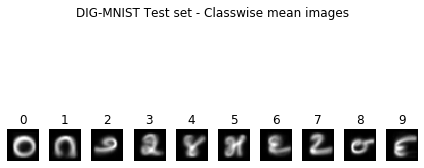

In [43]:
for i in range(10):
  plt.subplot(1,10,i+1)
  plt.imshow(np.squeeze(np.mean(x_test[y_test==i], axis=0)),cmap='gray')
  plt.axis('Off')
  plt.title(i)  
  plt.tight_layout()
plt.suptitle('DIG-MNIST Test set - Classwise mean images')

Text(0.5, 1.0, 'Dig Test')

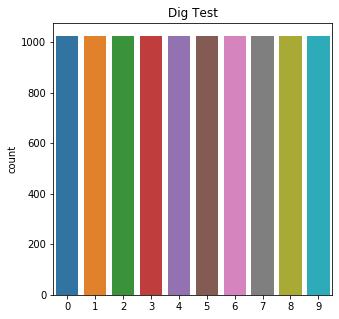

In [44]:
fig, ax =plt.subplots(1, 1, figsize=(5, 5))
a4 = sns.countplot(y_test, ax=ax)
a4.set_title('Dig Test')

In [45]:
dig_test = {
            "x_test": x_test,
            "y_test": y_test,
            }

In [46]:
with open("data/dig_test.pkl", 'wb') as f:
    pickle.dump(dig_test, f, pickle.HIGHEST_PROTOCOL)